In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Advertising.csv')
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [11]:
df.info()  #always do this in the beginning to tackel the problem of null values and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


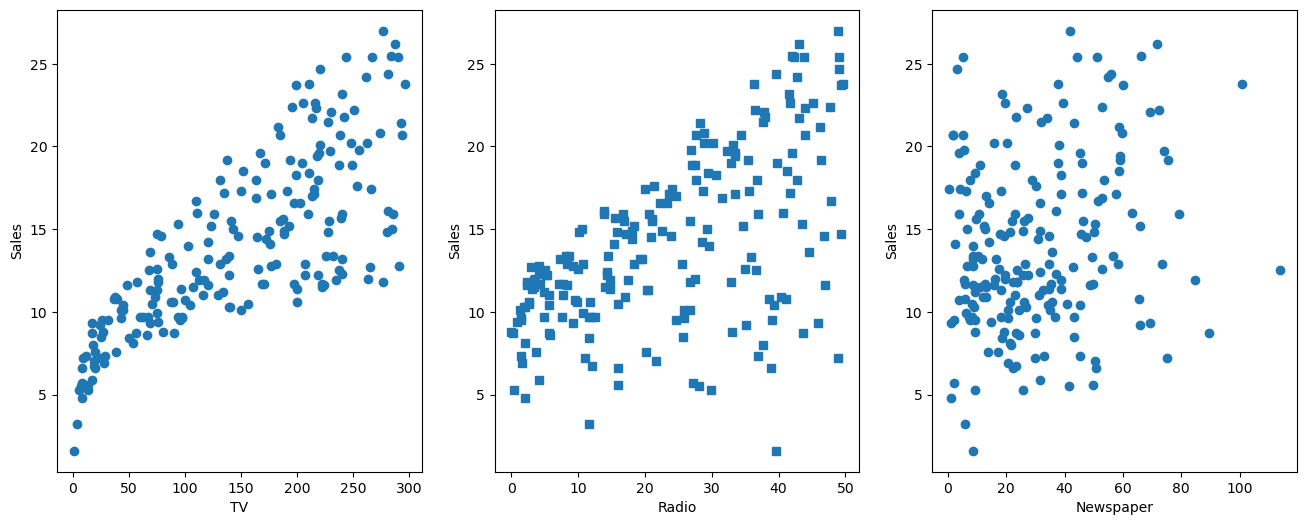

In [12]:
fig, axes = plt.subplots(nrows =1, ncols =3, figsize =(16,6))

axes[0].plot(df['TV'], df['sales'],'o')
axes[0].set_ylabel('Sales')
axes[0].set_xlabel('TV')

axes[1].plot(df['radio'], df['sales'],'s')
axes[1].set_ylabel('Sales')
axes[1].set_xlabel('Radio')

axes[2].plot(df['newspaper'], df['sales'],'o')
axes[2].set_ylabel('Sales')
axes[2].set_xlabel('Newspaper')

plt.show()

C:\Users\heros\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\heros\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\heros\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\heros\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

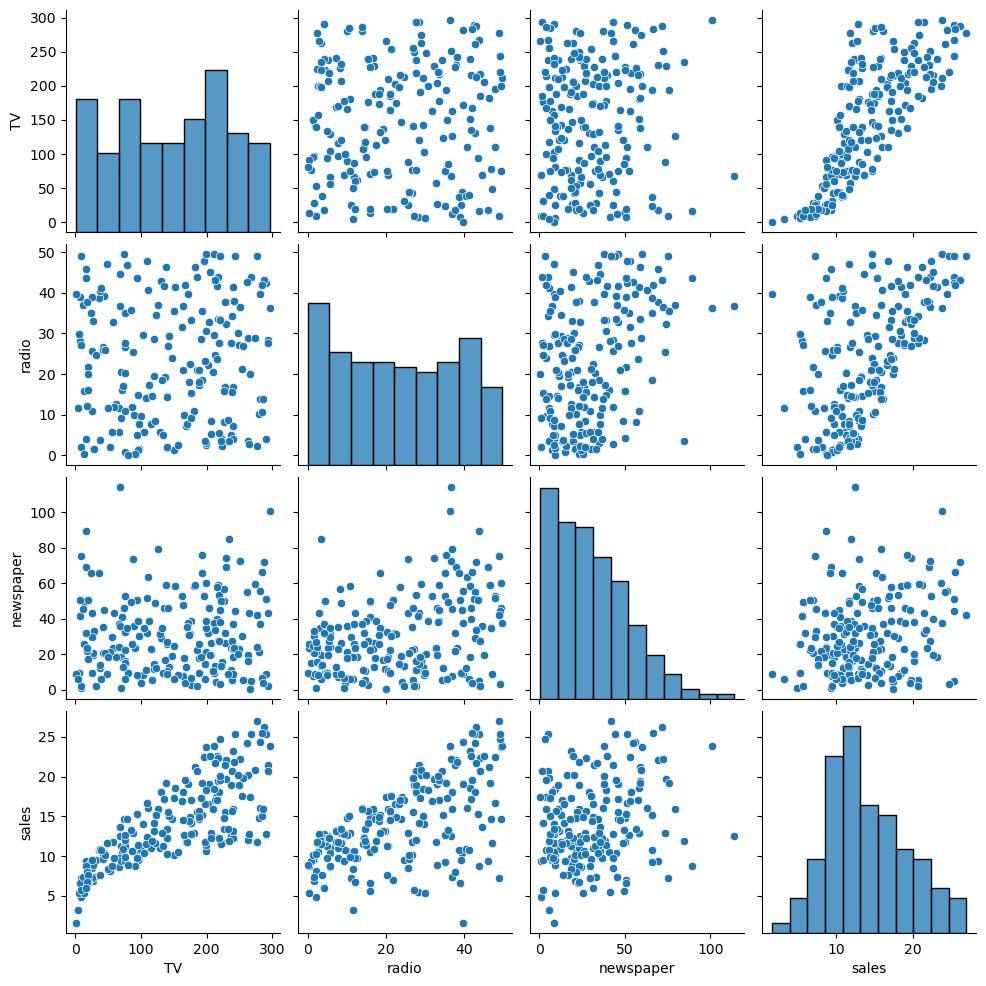

In [13]:
#other way of plotting 

sns.pairplot(df)

### SciKit Learn 

In [15]:
X = df.drop('sales', axis = 1)  #features
y = df['sales']

### Train Test split

always there in supervised learning

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=  1/3, random_state= 50)

# choose test size such that you have sufficient number of rows to test your model on (absolute number).

In [17]:
X_train

,TV,radio,newspaper
74,213.4,24.6,13.1
118,125.7,36.9,79.2
191,75.5,10.8,6.0
156,93.9,43.5,50.5
77,120.5,28.5,14.2
...,...,...,...
132,8.4,27.2,2.1
33,265.6,20.0,0.3
109,255.4,26.9,5.5
139,184.9,43.9,1.7


### Import a model class from a model family 

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
# create an instance of the model with parameters

l_model = LinearRegression()

### Fit/Train the model on the training Data

In [21]:
l_model.fit(X_train, y_train)
#make sure that you only fit to the training data in order to fairly evaluate your model's performance on unseen data

LinearRegression()

In [29]:
y_prid = l_model.predict(X_test) #this is predicted sales  (labels)

y_prid
# y_test is the true sales

array([13.87057718, 15.01552826, 10.55180271, 10.07071504, 10.17600154,
       18.45701851, 15.37849144,  3.44598251, 20.59883602, 11.94758021,
       15.10389107, 12.85162114, 21.15674861, 14.37943082, 15.99557741,
       16.96289139, 10.26390561, 16.80769543,  9.52691851, 12.50298739,
       16.88527161, 10.13256425,  8.02741222, 13.99812353, 21.36227455,
       14.20729858,  7.17409258,  7.53092545, 15.44601148, 13.61548538,
       14.89178416, 10.20777307, 11.92349927, 16.42370583,  6.54273265,
        9.59084638, 12.98377482, 20.54977003,  9.12170429, 11.28302445,
        7.2575045 , 24.65775515,  9.76584517, 18.27978451, 16.58342362,
       12.02457583, 12.4297889 , 16.14047754,  8.7397192 ,  7.78882132,
       12.1777782 , 12.06420435, 14.38530375, 10.45183742, 17.5957909 ,
       16.70030328, 16.46483663,  3.50361421, 23.23901517, 13.22526546,
       15.08696395, 17.11550335,  4.3810752 , 13.90878295, 19.45990068,
       12.75368687, 13.54281849])

### Evaluate model performance

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [28]:
df['sales'].mean()

14.0225

In [30]:
MAE = mean_absolute_error(y_test, y_prid)
MSE = mean_squared_error(y_test, y_prid)
RMSE = np.sqrt(MSE)

In [31]:
MAE  #approx 10% error

1.2146609142953708

In [32]:
MSE  #kind of variance of prediction 

2.558283783697997

In [33]:
RMSE #kind of standard variation of prediction #10% error

1.5994635924890561

### Plotting Residuals

In [34]:
test_residual = y_test - y_prid

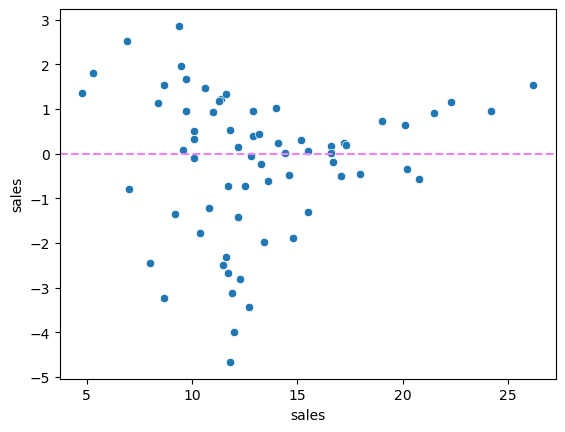

In [38]:
sns.scatterplot(x=y_test, y=test_residual)
plt.axhline(y=0, color ='violet', ls='--')

C:\Users\heros\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


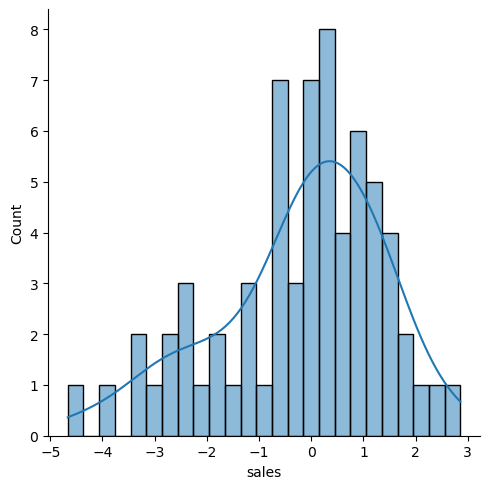

In [40]:
sns.displot(test_residual, kde=True, bins =25)

### Retraining Model on full Data 

In [41]:
# create a new model instance to train on entire dataset 

final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

### Deployment, Predictions and Model Attributes

In [42]:
# Final model fit 

y_hat = final_model.predict(X)

In [43]:
len(y_hat)

200

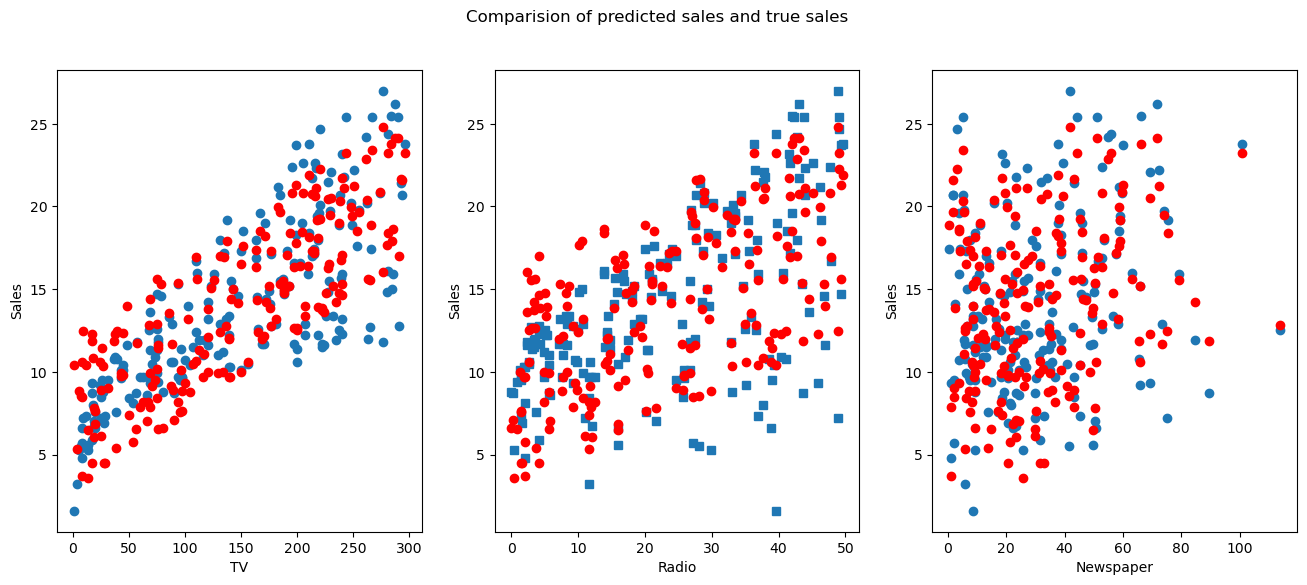

In [44]:
fig, axes = plt.subplots(nrows =1, ncols =3, figsize =(16,6))

axes[0].plot(df['TV'], df['sales'],'o')
axes[0].plot(df['TV'], y_hat, 'o', color ='red')
axes[0].set_ylabel('Sales')
axes[0].set_xlabel('TV')

axes[1].plot(df['radio'], df['sales'],'s')
axes[1].plot(df['radio'], y_hat, 'o', color ='red')
axes[1].set_ylabel('Sales')
axes[1].set_xlabel('Radio')

axes[2].plot(df['newspaper'], df['sales'],'o')
axes[2].plot(df['newspaper'], y_hat, 'o', color ='red')
axes[2].set_ylabel('Sales')
axes[2].set_xlabel('Newspaper')

plt.suptitle('Comparision of predicted sales and true sales')
plt.show()

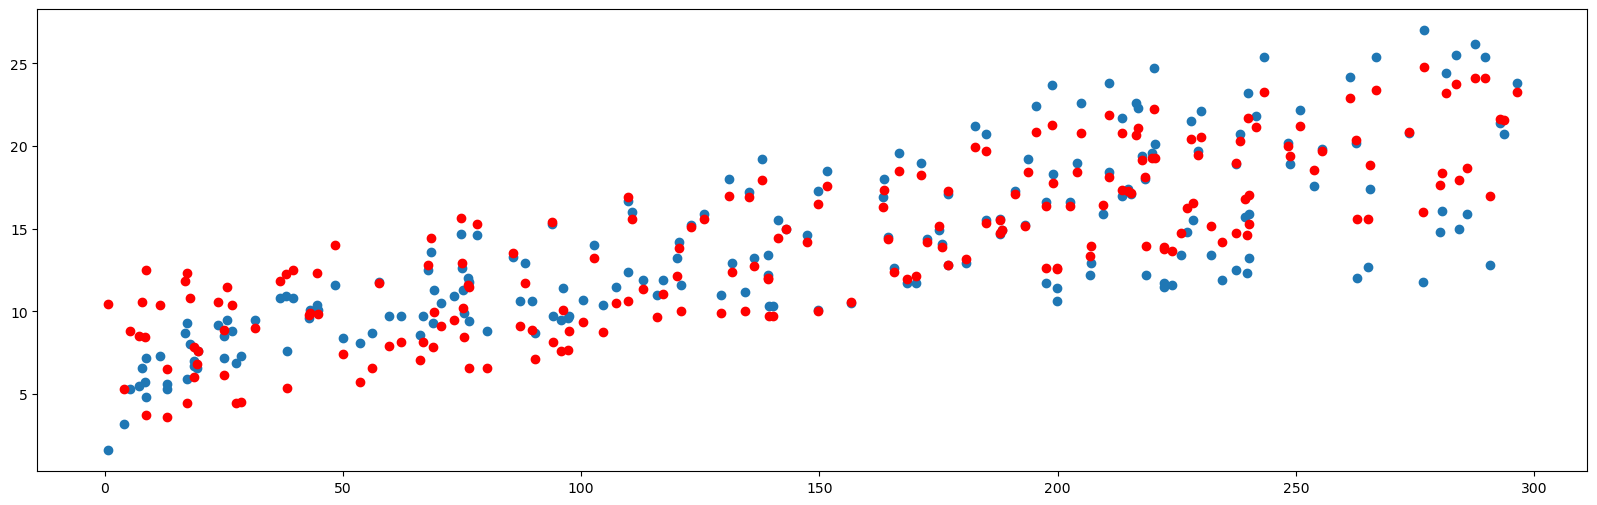

In [46]:
plt.figure(figsize=(20,6))
plt.plot(df['TV'], df['sales'],'o')
plt.plot(df['TV'], y_hat, 'o', color ='red')

### Residuals

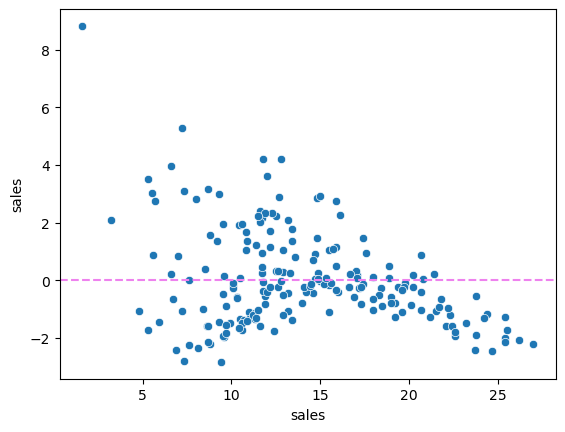

In [48]:
sns.scatterplot(x=y, y = y_hat-y)
plt.axhline(y=0, color ='violet', ls='--')

In [49]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [50]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

* If I hold all other features fixed then 1000 units in TV spend --->  0.045 *1000 ---> 45 increase in sales
*  If I hold all other features fixed then 1000 units in newspaper spend --->  1 unit decrease in sales

In [54]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Prediction on New Data

In [57]:
campaign =  [[149,23,12], [149,23,12000]]

final_model.predict(campaign)

C:\Users\heros\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14.08156201,  1.64409542])

### Model presistence (Saving and loading a model)

In [58]:
from joblib import dump, load

In [59]:
dump(final_model, 'sales_model_hmlpa.joblib')

['sales_model_hmlpa.joblib']